#### Exploratory Data Analysis - Why are employees leaving
We will use our Python Tools to understand the data of employees leaving and try to answer an analytics question: **Why are employees Leaving?**. 
Data can be presented in any format - Excel Sheets, CSV (Comma Separated Values) format, HDF5 data etc. 
<br>Before we jump into actual data analysis we need to first understand what is the motivation behind EDA. EDA can be done for the following objectives:
- To understand what is the distribution of the data
    - For numerical data we try to identify underlying distribution - some other metrics which may be computed include: Mean, Median, Mode, Standard Deviation
    - For categorical data we try to tabulate the data. 
    - Try to identify relationships between the variables
Generally in our data analysis exercise we try to predict a particular variable. In our exercise we will try to predict employee churn basis the available variable. More on this subsequently first let us start understanding our data. 

We will be doing this in Python. Important libraries to be used are:
- **Pandas**: Probably one of the most important data analysis libraries



In [2]:
import pandas as pd

In [3]:
employee_data = pd.read_csv("Why are employees leaving.csv")

CSV is comma delimited format which is one of the most common format for data tables. Other options which may be used for reading different data types can be:
- **read_json**: JSON (JavaScript Object Notations) used for Internet based data exchange. Are very similar to dictionary formats. 
- **read_html**: Hyper Text Markup Language are text files which are used for rendering webpages and can be used to store data as well. 
- **read_sql**: Can be used to read/ write to databases.
- **read_pickle**: These are binary files which are used for keeping data hierarchy in python. 
We will mostly be working with CSV file in this article. 

#### First steps in our EDA:
First step for data analysis will be to understand the dimensions of the data and what exactly is there. Therefore we will be using following functions:
- shape: To get the # of rows and columns in the data
- head: To get first few rows of the data
- columns: To get the names of the columns
- 

In [4]:
employee_data.shape
#This shows our data has 14,999 rows and 11 columns: Every dataframe is represented by ROWS X COLUMNS format

(14999, 11)

In [5]:
#Let us look at what are these columns
employee_data.columns
#So we have data points - ID, Satisfaction_level, etc. in the data

Index(['ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Division', 'salary'],
      dtype='object')

In [6]:
#Let us look at the first few rows of the data set
employee_data.head()
#Looks like out of 11 columns 2 are categorical variables viz - Division and Salary rest all seem to be numerical variables

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Division,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,low
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,low
4,5,0.37,0.52,2,159,3,0,1,0,sales,low


We did a cardinal mistake in the code snippet above, just basis the head of the data we decided 2 are categorical and rest all are numerical. However, this might not be true and our data might have some variable types as mixed. You can confirm your assumption by looking at the tail by ```employee_data.tail()```. 
<br>Alternatively, we could even look at more number of rows by using ```employee_data.head(20)``` this will show 20 rows of the data default (without any value) shows 5 rows as above. 
<br>One more interesting thing here is the rownumbers in extreme left these are known as row indices, they will form important part of our data analysis in Python. We will come to this when required. 

In [7]:
employee_data.head(20)

,ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Division,salary
0,1,0.38,0.53,2,157,3,0,1,0,sales,low
1,2,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,4,0.72,0.87,5,223,5,0,1,0,sales,low
4,5,0.37,0.52,2,159,3,0,1,0,sales,low
5,6,0.41,0.50,2,153,3,0,1,0,sales,low
6,7,0.10,0.77,6,247,4,0,1,0,sales,low
7,8,0.92,0.85,5,259,5,0,1,0,sales,low
8,9,0.89,1.00,5,224,5,0,1,0,sales,low
9,10,0.42,0.53,2,142,3,0,1,0,sales,low


In [8]:
employee_data['Division'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Division, dtype: int64

value_counts generates output which is sorted basis the frequency of the result. We can append sort_index() to sort basis the value of division.

In [9]:
employee_data['Division'].value_counts().sort_index()
#Remeber in python small case and capital case are different orders and there is an ASCII code basis sorting. 

IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: Division, dtype: int64

##### ASCII Codes
ASCII (American Standard Code for Information Interchange) is character coding framework for computers. To compute ASCII code of any character you can extract via ```ord('C`)``` will give ASCII code of capital C. Capital characters have lower ASCII code than small case. Therefore in above result our words starting with capital letters got sorted first and then words starting with small case. 
<br>If we need to correct this we can convert every thing in proper case. Which can be done via ```str.title()``` function on the stipulated column.

In [13]:
#ASCII Character coding
print(ord("I"))
print(ord("a"))

73
97


In [40]:
employee_data['Division'] = employee_data['Division'].str.upper()
employee_data['Division'].value_counts().sort_index()
#Now the index soring is proper as per the requirement

ACCOUNTING      767
HR              739
IT             1227
MANAGEMENT      630
MARKETING       858
PRODUCT_MNG     902
RANDD           787
SALES          4140
SUPPORT        2229
TECHNICAL      2720
Name: Division, dtype: int64

Let us look at some of the other columns and see what are the distributions of various numerical and non-numeric data. 

In [41]:
for columns in employee_data.columns:
    print(f"*********COLUMN VALUE = {columns}**********")
    print(employee_data[columns].value_counts().sort_index())
#This can be used to look at all the columns in the dataframe

*********COLUMN VALUE = ID**********
1        1
2        2
4        1
5        1
6        1
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: ID, Length: 14998, dtype: int64
*********COLUMN VALUE = satisfaction_level**********
0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
       ... 
0.96    203
0.97    176
0.98    183
0.99    172
1.00    111
Name: satisfaction_level, Length: 92, dtype: int64
*********COLUMN VALUE = last_evaluation**********
0.36     22
0.37     55
0.38     50
0.39     52
0.40     57
       ... 
0.96    249
0.97    276
0.98    263
0.99    258
1.00    283
Name: last_evaluation, Length: 65, dtype: int64
*********COLUMN VALUE = number_project**********
2    2388
3    4055
4    4365
5    2761
6    1174
7     256
Name: number_project, dtype: int64
*********COLUMN VALUE = average_montly_hours**********
96      6
97     14
98     23
99     11
100    19
       ..
306    18
307    14
308    20
309    16
310    18
Name: average_montly_hours, L

Another way to look at the data (numerical) is to look:
1. Median
2. Mean
3. Standard Deviation
4. Quartiles
<br>Python code for the same is ```employee_data['satisfaction level`].describe()``` This will provide a summary statistics for a particular column. Good thing is this works on entire data-frame ```employee_data.describe()``` also it chooses all the columns which are numeric in nature and provide the summary statistics. 

In [29]:
print(employee_data['satisfaction_level'].describe())
print(employee_data.describe())

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64
                 ID  satisfaction_level  last_evaluation  number_project  \
count  14999.000000        14999.000000     14999.000000    14999.000000   
mean    7499.999933            0.612834         0.716102        3.803054   
std     4329.982794            0.248631         0.171169        1.232592   
min        1.000000            0.090000         0.360000        2.000000   
25%     3750.500000            0.440000         0.560000        3.000000   
50%     7500.000000            0.640000         0.720000        4.000000   
75%    11249.500000            0.820000         0.870000        5.000000   
max    14999.000000            1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          149

In [31]:
#Let us try to print the output of desribe for categorical variable like division
employee_data['Division'].describe()
#Gives count based data and also provides output for top frquency. (Better to look at value_counts for categorical data)

count     14999
unique       10
top       Sales
freq       4140
Name: Division, dtype: object

#### Pictures speak 1000 words:
Till now we have been looking at the numerical statistics about the data. We could look at the data visually and it might provide us with better description. For this we will need ```matplotlib``` library one of the most important visual library.
<br>Matplotlib creates a plot object and in-order to display the plot (only) we need to use plt.show to display the plot.

In [32]:
import matplotlib.pyplot as plt

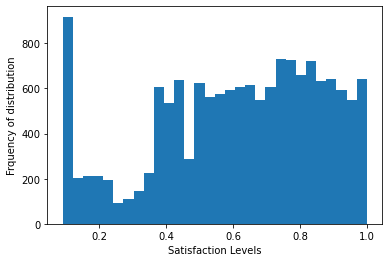

In [36]:
plt.hist(employee_data['satisfaction_level'],bins = 30)
plt.xlabel('Satisfaction Levels')
plt.ylabel('Frquency of distribution')
plt.show()

We can see the distribution of satisfaction level is pretty much uniform with some peaks and troughs at lower levels of the satisfaction levels. 

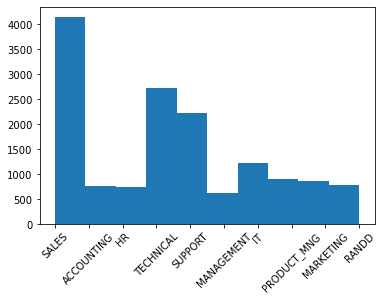

In [42]:
plt.hist(employee_data['Division'])
ax = plt.gca() #GCA Gives the "GET CURRENT AXES"
ax.tick_params(axis = 'x',labelrotation =45)
plt.show()

We are changing the axes labels by 45 Degrees to display the data properly. We can see from the data that the sales has maximum people followed by Technical and Support.  
<br>Let us plot all the variables in a histogram and try to see the distribution for each of the variables. ID will not be a relevant variable to be looked at as it is a unique key for the data. 
<br>We will use one more python code implementation - "continue" this is use for loop management in case the loop element is not to be executed continue will just ignore the remaining section of the code and it goes for next level of execution. 

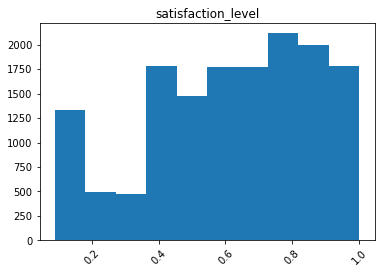

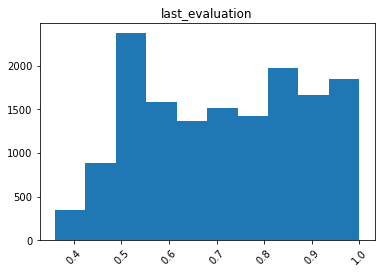

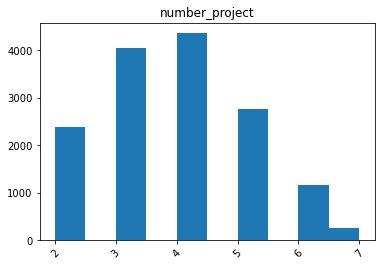

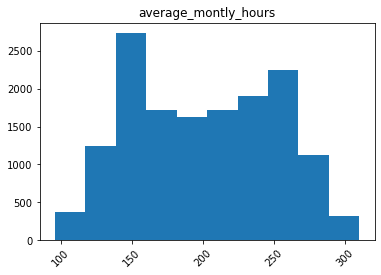

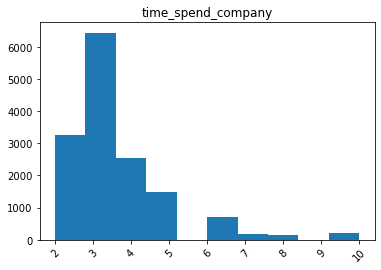

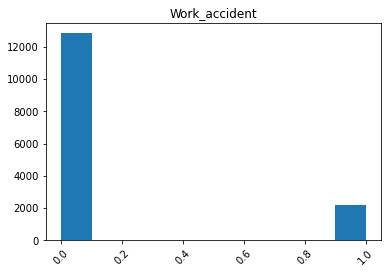

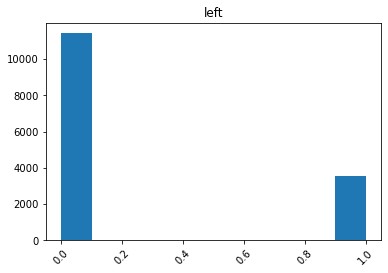

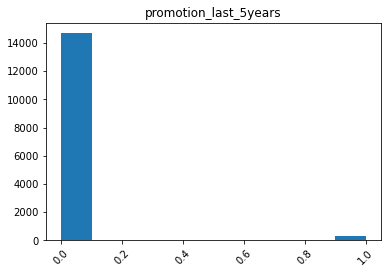

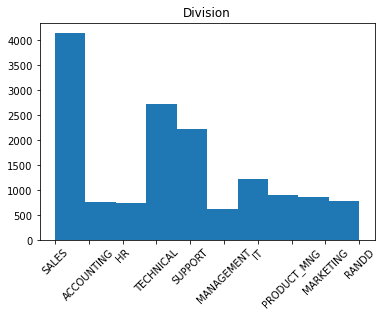

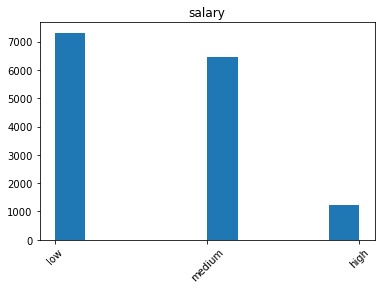

In [49]:
for columns in employee_data.columns:
    if columns == 'ID':
        continue
    plt.hist(employee_data[columns])
    ax = plt.gca()
    ax.tick_params(axis = 'x',labelrotation = 45)
    plt.title(columns)
    plt.show()
    

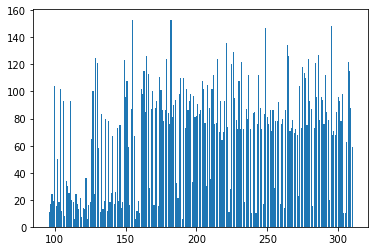

In [111]:
employee_data['average_montly_hours'].unique()
figure,axis = plt.subplots()
plot = axis.bar(employee_data['average_montly_hours'].unique(),employee_data['average_montly_hours'].value_counts().sort_index())

In [112]:
employee_data['average_montly_hours'].unique()
employee_data['average_montly_hours'].value_counts().sort_index()

96      6
97     14
98     23
99     11
100    19
       ..
306    18
307    14
308    20
309    16
310    18
Name: average_montly_hours, Length: 215, dtype: int64

In [113]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Division               14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


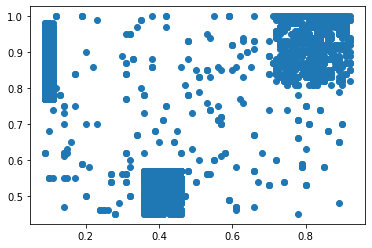

In [118]:
plt.scatter(left_data['satisfaction_level'],left_data['last_evaluation'])

In [119]:
left_data = employee_data[employee_data['left']==1]
not_left = employee_data[employee_data['left']==0]

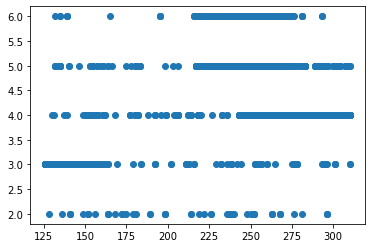

In [121]:
plt.scatter(left_data['average_montly_hours'],left_data['time_spend_company'])

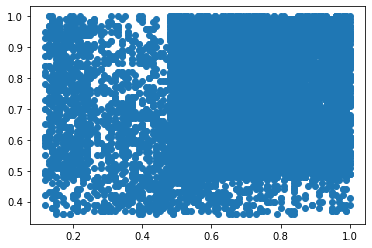

In [120]:
plt.scatter(not_left['satisfaction_level'],not_left['last_evaluation'])

In [124]:
print(left_data.groupby('satisfaction_level'))